In [1]:
import sys

ell_idx = 42#eval(sys.argv[1])
print('ell_idx', ell_idx)

from LIMxCMBL.init import *
from tqdm import trange

ell_idx 42


In [2]:
ell_curr = ells[ell_idx]
oup_fname = '/scratch/users/delon/LIMxCMBL/NON_LIN_dkparp_integral/ell_idx_%d.npy'%(ell_idx)
print('outputting to', oup_fname)

print('chib bounds', min(chibs), max(chibs))
print('delta bounds', min(deltas), max(deltas))
_chibs, _deltas = np.meshgrid(chibs, deltas, indexing='ij')
print('oup dimension', _chibs.shape)

_chibs  = np.reshape(_chibs,  (len(chibs) * len(deltas)))
_deltas = np.reshape(_deltas, (len(chibs) * len(deltas)))

print('geometric recalibration')
kperp2s = ell_curr*(ell_curr+1) / (_chibs**2 * (1 - _deltas**2))

outputting to /scratch/users/delon/LIMxCMBL/NON_LIN_dkparp_integral/ell_idx_42.npy
chib bounds 10.0 10968.678928805972
delta bounds 1e-06 0.7
oup dimension (256, 128)
geometric recalibration


In [3]:
from scipy.interpolate import interp1d

_tmp_ks = np.logspace(-10, 10, 1000)
f_logPnl = interp1d(x = np.log(_tmp_ks),
                 y = np.log(ccl.nonlin_matter_power(cosmo, _tmp_ks, 1)),
                 bounds_error=False, fill_value=0)

[]

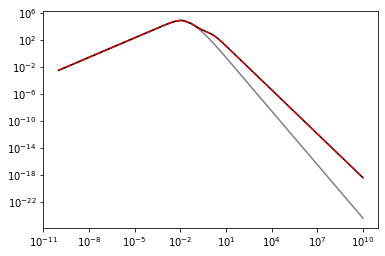

In [5]:
import matplotlib.pyplot as plt
_tmp_ks = np.logspace(-10, 10, 1000)
plt.plot(_tmp_ks, ccl.linear_matter_power(cosmo, _tmp_ks, 1), c='gray')
plt.plot(_tmp_ks, ccl.nonlin_matter_power(cosmo, _tmp_ks, 1), c='k')
plt.plot(_tmp_ks, np.exp(f_logPnl(np.log(_tmp_ks))), 'r--')

plt.loglog()

In [ ]:
from scipy.integrate import quad, quad_vec
from scipy.interpolate import interp1d

for i in range(len(chibs)):
    for j in range(len(deltas)):
        assert(np.abs(kperp2s[i*len(deltas)+j] - ell_curr*(ell_curr+1) / (chibs[i]**2 * (1 - deltas[j]**2))) < 1e-8)

def integrand(kparp):
    return 2/(2*np.pi) * np.cos(kparp * 2 * _chibs * _deltas) * f_Pnl(np.sqrt(kparp**2 + kperp2s))

print('beginning quad_vec')

res, err = quad_vec(integrand, 0, np.inf,
                  epsabs = 0.0, epsrel=1e-4, limit=1123456, workers=32)

oup = np.reshape(res, (len(chibs), len(deltas)))


np.save(oup_fname, oup)
print('outputted to', oup_fname)